In [7]:
import numpy as np
import random
import dadi
import pickle
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.getcwd(), '..')) # this is the ml_dadi dir
import data_manip
import ml_models
import plotting

In [3]:
# Load trained ML models to run bootstrap on
list_rfr = pickle.load(open('data/list_rfr_exclude_log','rb'))
list_mlpr = pickle.load(open('data/list_mlpr_lbfgs_exclude_log','rb'))

In [2]:
# # Generate bootstrap datasets for 1d_2epoch model
# bootstrap_params = []

# while (len(bootstrap_params) < 200):   
#     nu = random.random() * 4 - 2
#     T = random.random() * 1.9 + 0.1
#     # exclude T/nu > 5
#     if T/10**nu <= 5:
#         params = (nu, T)
#         bootstrap_params.append(params)

# # generate a list of theta values to run scaling and add variance
# theta_list = [10000, 1000, 100]
# # Note: needs to match the list used to generate bootstrap data 

# # # print some info of testing data
# # print('n_samples testing: ', len(bootstrap_params))
# # print('Range of testing params:', min(bootstrap_params), 'to', 
# #         max(bootstrap_params))
# # print('Theta list:', theta_list)

# # designate demographic model, sample size, and extrapolation grid 
# func = dadi.Demographics1D.two_epoch
# ns = [20]
# pts_l = [40, 50, 60]
# logs = [True, False]

# list_bootstrap_dicts = data_manip.generating_data(bootstrap_params, 
#                         theta_list, func, ns, pts_l, logs, bootstrap=True)
# pickle.dump(list_bootstrap_dicts, open('data/bootstrap_data', 'wb'), 2)

In [4]:
# Load bootstrap samples: list of 3 dicts for Theta list: [10000, 1000, 100]
# Each dict contain 200 items with the format 
# true_p:[orig_fs,[200 bootstrapped fs from orig_fs]]
list_bootstrap_dicts = pickle.load(open('data/bootstrap_data', 'rb'))

In [14]:
# # Choose one trained model from the list to run bootstrap on
# rfr_1 = list_rfr[0]
# bstr_rfr_1 = data_manip.bootstrap_predictions(rfr_1, list_bootstrap_dicts)
# pickle.dump(bstr_rfr_1, 
#                 open('results/bootstrap/boostrap_pred_rfr_1', 'wb'), 2)

In [20]:
# # Choose one trained model from the list to run bootstrap on, for new_log data
# rfr_1000 = list_rfr[2]
# bstr_rfr_1000 = data_manip.bootstrap_predictions(rfr_1000, list_bootstrap_dicts)
# pickle.dump(bstr_rfr_1000, 
#             open('results/bootstrap/boostrap_pred_rfr_1000', 'wb'), 2)

In [17]:
# # Choose one trained model from the list to run bootstrap on
# mlpr_1000 = list_mlpr[2]
# bstr_mlpr_1000 = data_manip.bootstrap_predictions(mlpr_1000, list_bootstrap_dicts)
# pickle.dump(bstr_mlpr_1000, 
#                 open('results/bootstrap/boostrap_pred_mlpr_1000', 'wb'), 2)

In [8]:
# # Choose one trained model from the list to run bootstrap on
# mlpr_1 = list_mlpr[0]
# bstr_mlpr_1 = ml_models.model_bootstrap(mlpr_1, list_bootstrap_dicts)
# pickle.dump(bstr_mlpr_1, 
#                 open('results/bootstrap/boostrap_pred_mlpr_1', 'wb'), 2)

In [9]:
# # Choose one trained model from the list to run bootstrap on
# mlpr_10000 = list_mlpr[1]
# bstr_mlpr_10000 = ml_models.model_bootstrap(mlpr_10000, list_bootstrap_dicts)
# pickle.dump(bstr_mlpr_10000, 
#                 open('results/bootstrap/boostrap_pred_mlpr_10000', 'wb'), 2)

In [10]:
# # Choose one trained model from the list to run bootstrap on
# mlpr_1000 = list_mlpr[2]
# bstr_mlpr_1000 = ml_models.model_bootstrap(mlpr_1000, list_bootstrap_dicts)
# pickle.dump(bstr_mlpr_1000, 
#                 open('results/bootstrap/boostrap_pred_mlpr_1000', 'wb'), 2)

In [11]:
bstr_rfr_1 = pickle.load(open('results/bootstrap/boostrap_pred_rfr_1', 'rb'))
bstr_rfr_1000 = pickle.load(open('results/bootstrap/boostrap_pred_rfr_1000', 'rb'))
bstr_mlpr_1000 = pickle.load(open('results/bootstrap/boostrap_pred_mlpr_1000', 'rb'))
bstr_mlpr_1 = pickle.load(open('results/bootstrap/boostrap_pred_mlpr_1', 'rb'))
bstr_mlpr_10000 = pickle.load(open('results/bootstrap/boostrap_pred_mlpr_10000', 'rb'))

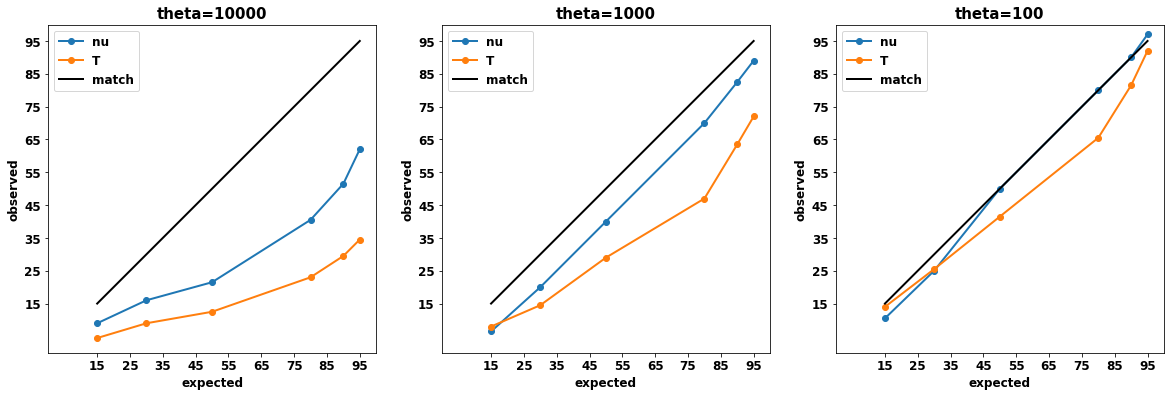

In [17]:
# Plot MLPR_1 bootstrap prediction results: coverage
params = ['nu', 'T']
theta_list = [10000, 1000, 100]
expected = [95, 90, 80, 50, 30, 15]

plt.figure(1, figsize=(20,8))
count=1
for bootstrap_pred, theta in zip(bstr_mlpr_1, theta_list):
    plt.figure(1).add_subplot(1, 3, count)
    plotting.plot_coverage(bootstrap_pred, theta, params, expected)
    count+=1

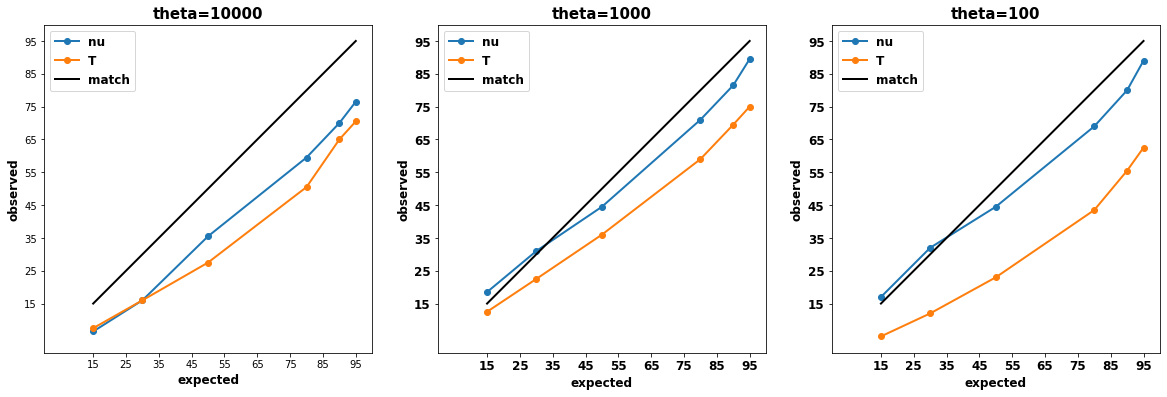

In [12]:
# Plot RFR_1 bootstrap prediction results: coverage
params = ['nu', 'T']
theta_list = [10000, 1000, 100]
expected = [95, 90, 80, 50, 30, 15]

plt.figure(1, figsize=(20,8))
count=1
for bootstrap_pred, theta in zip(bstr_rfr_1, theta_list):
    plt.figure(1).add_subplot(1, 3, count)
    plotting.plot_coverage(bootstrap_pred, theta, params, expected)
    count+=1

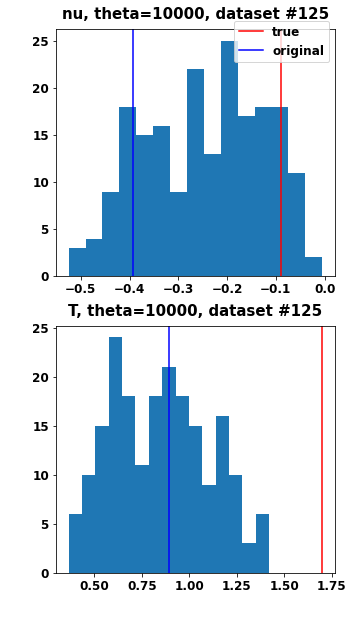

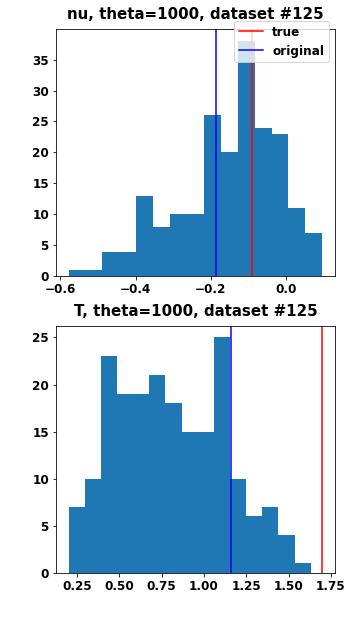

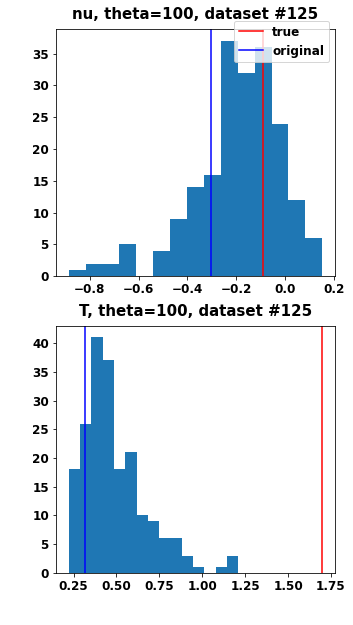

In [16]:
# Plot RFR_1 bootstrap prediction results: distribution for one example data set
params = ['nu', 'T']
theta_list = [10000, 1000, 100]
expected = [95, 90, 80, 50, 30, 15]

for bootstrap_pred, theta in zip(bstr_rfr_1, theta_list):
    plotting.plot_distribution(bootstrap_pred, theta, params, 125, figsize=(5,10))

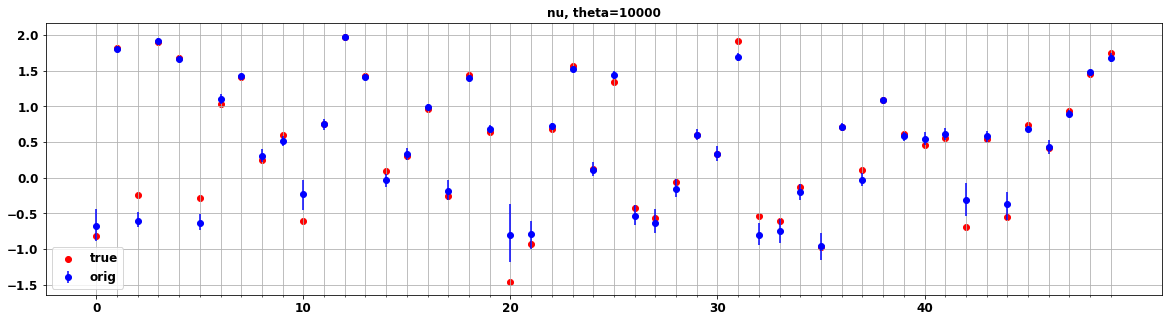

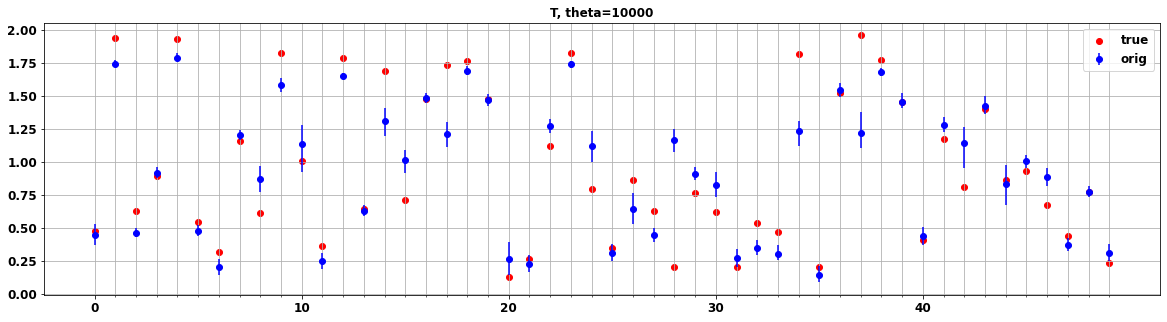

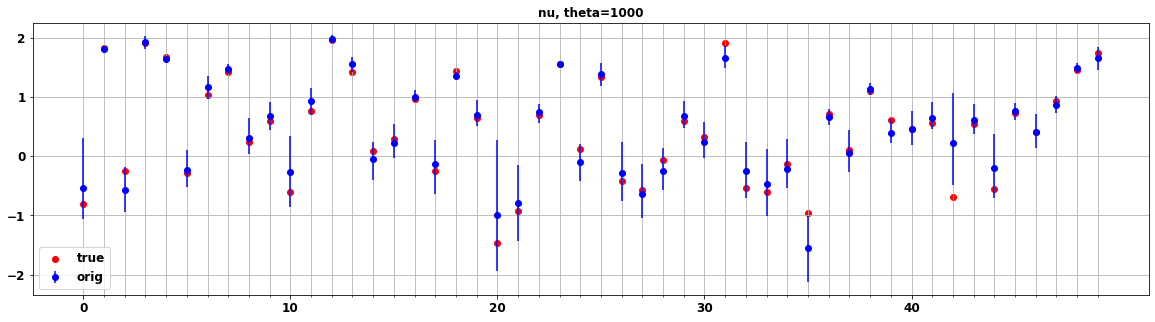

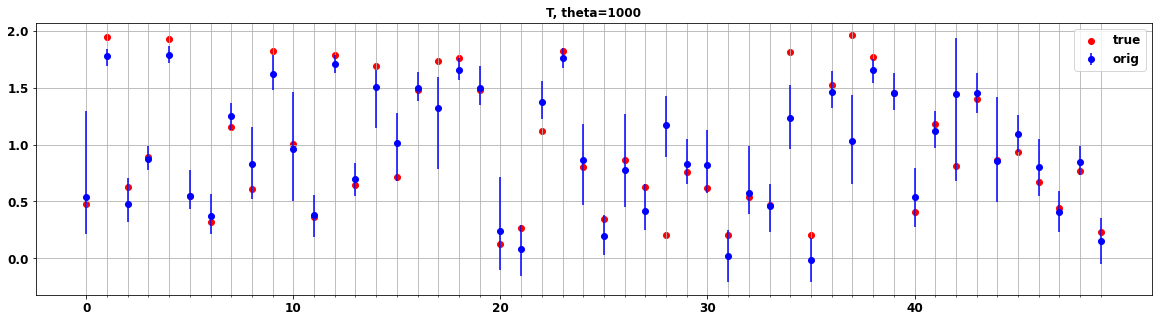

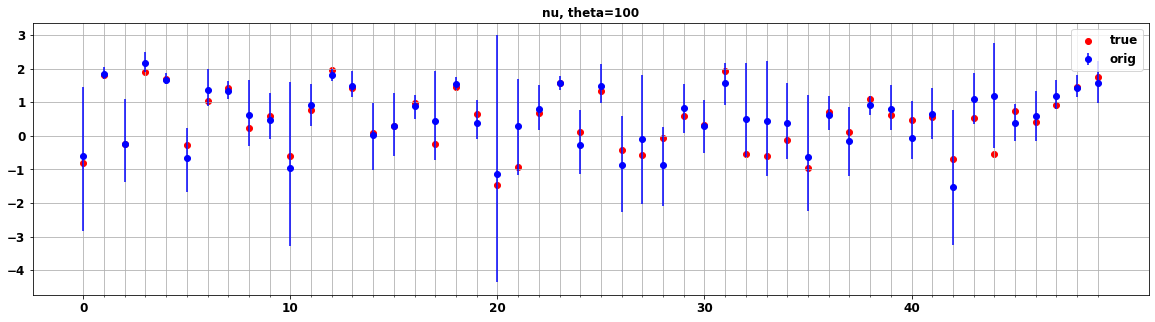

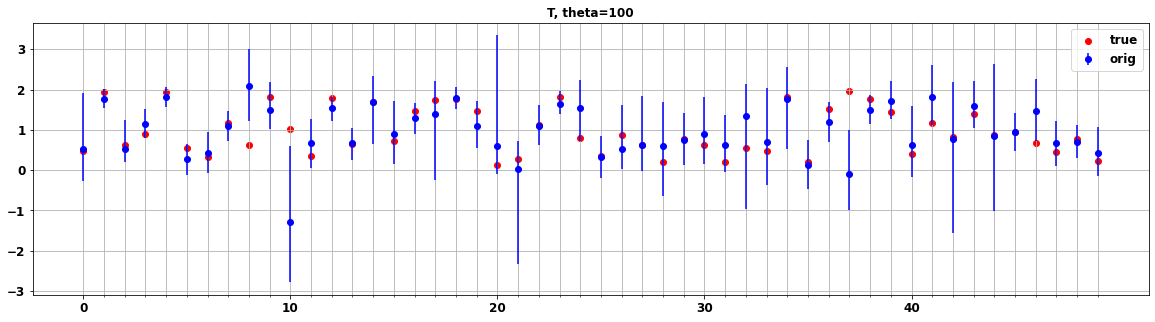

In [19]:
# Plot MLPR_1 bootstrap prediction results: intervals for 50 example data sets
params = ['nu', 'T']
theta_list = [10000, 1000, 100]
for bootstrap_pred, theta in zip(bstr_mlpr_1, theta_list):
    plotting.plot_intervals(bootstrap_pred, theta, params, size=50)

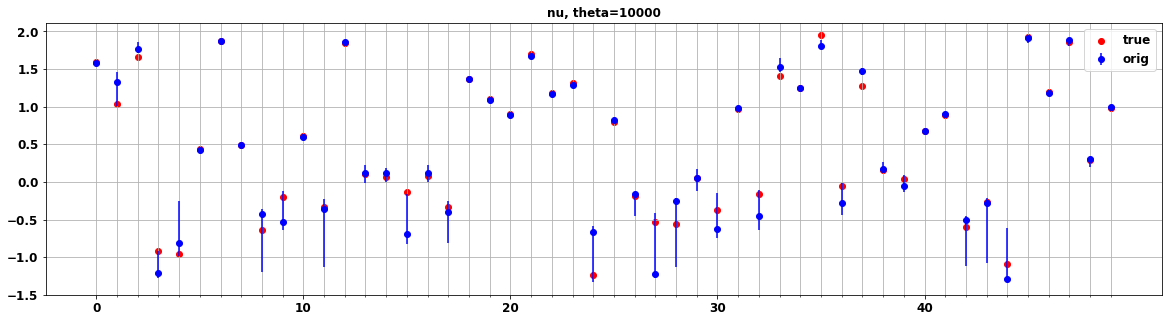

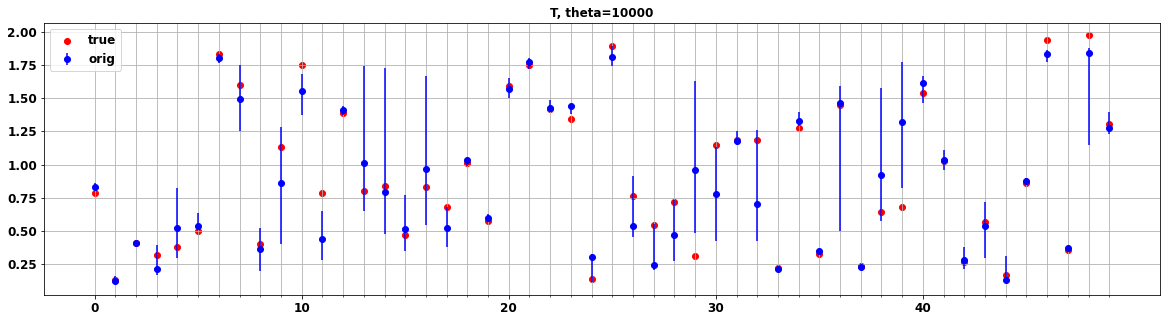

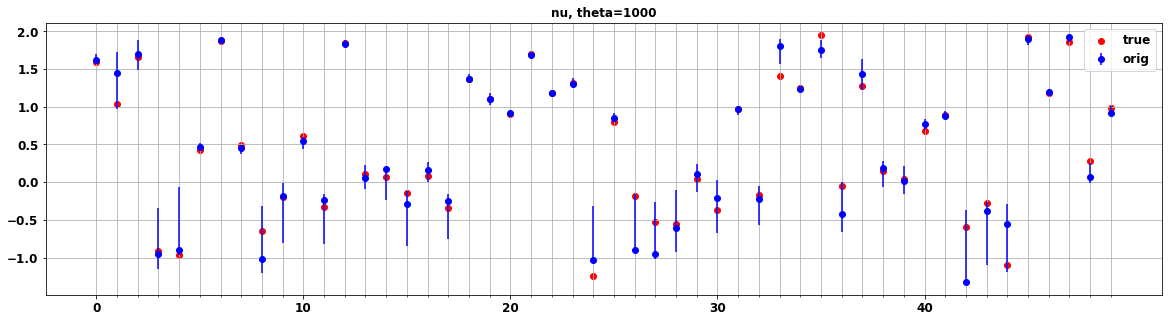

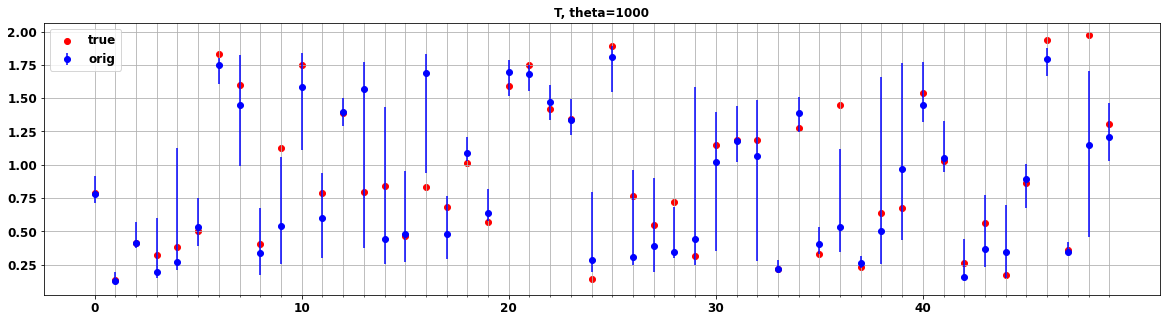

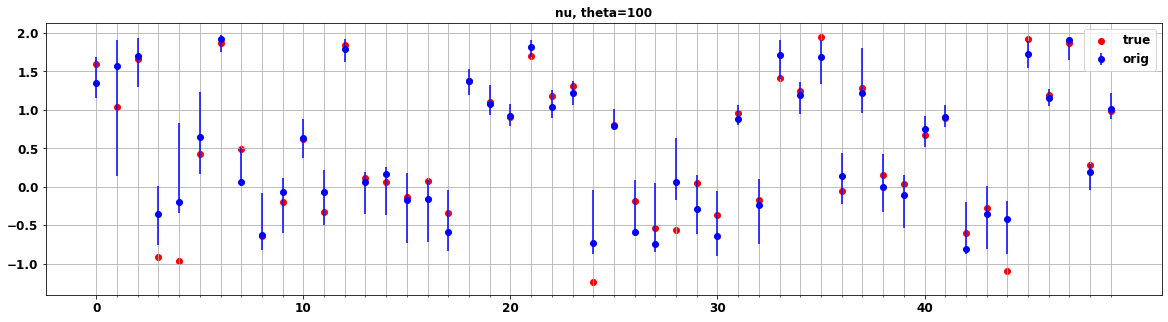

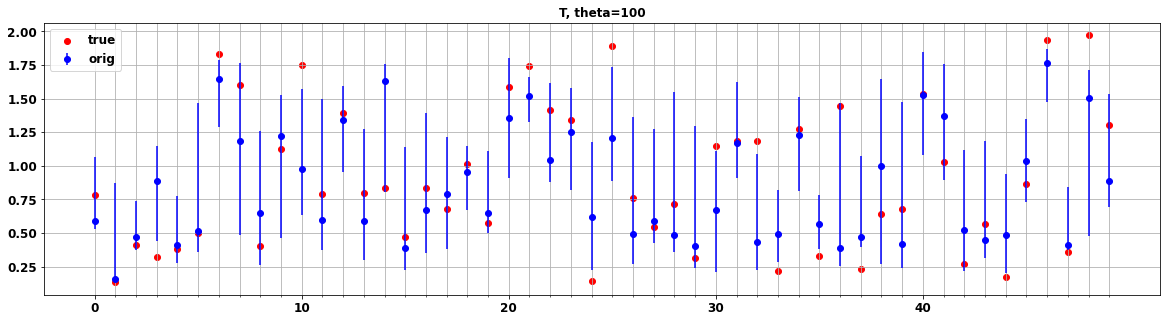

In [18]:
# Plot RFR_1 bootstrap prediction results: intervals for 50 example data sets
params = ['nu', 'T']
theta_list = [10000, 1000, 100]
for bootstrap_pred, theta in zip(bstr_rfr_1, theta_list):
    plotting.plot_intervals(bootstrap_pred, theta, params, size=50)